# Análisis de Cohortes para los Pagos de Ironhack

IronHack Payments, una empresa de servicios financieros de vanguardia, ha estado ofreciendo soluciones innovadoras de adelanto de efectivo desde su creación en 2020. Con un compromiso de proporcionar adelantos de dinero gratuitos y precios transparentes, IronHack Payments ha logrado una base de usuarios sustancial. Como parte de su esfuerzo continuo por mejorar sus servicios y entender el comportamiento de los usuarios, IronHack Payments ha encargado un proyecto de análisis de cohortes.

En este análisis, examinamos el comportamiento de los usuarios de IronHack Payments con respecto al servicio de adelanto de efectivo, utilizando un enfoque de cohortes. El objetivo es entender mejor el uso del servicio, la rentabilidad y los riesgos asociados para cada cohorte.

Las métricas clave calculadas en este análisis son:
1. **Frecuencia de Uso del Servicio**: Evalúa la frecuencia con la que los usuarios de cada cohorte utilizan el servicio a lo largo del tiempo.
2. **Tasa de Incidentes**: Determina la tasa de incidentes de pago para cada cohorte, enfocándose en rechazos de débito directo y transacciones fallidas.
3. **Ingresos Generados por Cohorte**: Calcula el total de ingresos generados por cada cohorte a lo largo de los meses.
4. **Tasa de Morosos**: Identifica el porcentaje de usuarios que cancelaron sus cuentas sin pagar lo que debían.

A lo largo de este análisis, se utilizarán estas métricas para evaluar el comportamiento de los usuarios y tomar decisiones informadas para mejorar el rendimiento del servicio.

## Importación y Exploración de Datos
Comenzamos cargando los archivos CSV que contienen los datos de `cash_request` y `fees`. Luego, exploramos brevemente la estructura de los datos para entender mejor el contenido de las columnas y el tipo de datos.

### Pasos:
1. Importar los archivos CSV con `pd.read_csv()`.
2. Usar `.info()` para ver el número de filas, columnas y tipos de datos.
3. Aplicar `.describe()` para observar estadísticas básicas de las columnas numéricas.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorar los avisos de tipo FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df_cash_request = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
df_fees = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [5]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [6]:
df_cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [7]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [8]:
df_cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [9]:
df_cash_request.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


## Conversión de Fechas a Formato Estándar
En esta celda, convertimos múltiples columnas de fechas al formato `datetime` para facilitar operaciones temporales. 

### Pasos:
1. Convertir las columnas relevantes al formato `datetime`, incluyendo `created_at`, `updated_at`, `reimbursement_date`, etc.
2. Usar `errors='coerce'` para convertir valores no válidos a `NaT`.
3. Formatear las fechas para mostrar solo año, mes y día.

In [11]:
df_cash_request[["created_at","updated_at","moderated_at", "reimbursement_date","money_back_date","send_at", "reco_creation", "reco_last_update"]] = df_cash_request[["created_at","updated_at","moderated_at", "reimbursement_date","money_back_date","send_at", "reco_creation", "reco_last_update"]].apply(pd.to_datetime, errors='coerce')

In [12]:
df_cash_request[["created_at","updated_at","moderated_at", "reimbursement_date","money_back_date","send_at", "reco_creation", "reco_last_update"]] = df_cash_request[["created_at","updated_at","moderated_at", "reimbursement_date","money_back_date","send_at", "reco_creation", "reco_last_update"]].apply(lambda col: col.dt.date)

In [13]:
df_cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                15912 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          3050 non-null   object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             12040 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16466 non-null  object 
 13  recovery_status             333

In [14]:
df_cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10,2019-12-11,804.0,2019-12-11,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
1,70,100.0,rejected,2019-12-10,2019-12-11,231.0,2019-12-11,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
2,7,100.0,rejected,2019-12-10,2019-12-11,191.0,2019-12-11,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
3,10,99.0,rejected,2019-12-10,2019-12-18,761.0,2019-12-18,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
4,1594,100.0,rejected,2020-05-06,2020-05-07,7686.0,2020-05-07,NaN,NaT,NaN,NaT,regular,NaT,NaN,NaT,NaT


In [15]:
df_cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                15912 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          3050 non-null   object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             12040 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16466 non-null  object 
 13  recovery_status             333

## Prueba de Cálculo de la Distancia entre Dos Fechas en Días
Aquí se calcula la diferencia en días entre dos fechas específicas para ver si las conversiones de fechas son correctas.

### Pasos:
1. Seleccionar dos filas consecutivas del DataFrame y calcular la diferencia entre sus fechas en la columna `created_at`.
2. Usar la operación de resta para obtener la diferencia en días.


In [17]:
df_cash_request['created_at'].loc[23966 ]-df_cash_request['created_at'].loc[23965]

datetime.timedelta(days=15)

In [18]:
df_cash_request.value_counts("status")

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

## Manejo de Valores Nulos en el DataFrame
Rellenar los valores nulos en la columna `user_id` con los valores de `deleted_account_id` cuando sea necesario. 

### Pasos:
1. Reemplazar valores nulos en `user_id` con los valores de `deleted_account_id` usando `fillna()`.
2. Filtrar el DataFrame para ver si existen registros donde `deleted_account_id` no es nulo.

In [20]:
df_cash_request["user_id"].fillna(df_cash_request["deleted_account_id"], inplace=True)

In [21]:
df_cash_request[df_cash_request["deleted_account_id"].notnull()]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10,2020-02-10,309.0,2020-02-10,309.0,2020-03-11,NaN,NaT,regular,NaT,NaN,NaT,NaT
8,5672,100.0,canceled,2020-06-28,2020-06-28,2499.0,NaT,2499.0,NaT,NaN,NaT,regular,NaT,NaN,NaT,NaT
19,545,100.0,rejected,2020-01-29,2020-02-08,304.0,2020-01-29,304.0,2020-02-28,NaN,NaT,regular,NaT,NaN,NaT,NaT
21,613,100.0,rejected,2020-02-05,2020-02-08,304.0,2020-02-06,304.0,2020-03-08,NaN,NaT,regular,NaT,NaN,NaT,NaT
25,84,100.0,rejected,2019-12-11,2020-01-10,91.0,2020-01-10,91.0,2020-01-10,NaN,NaT,regular,NaT,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24,2020-12-18,29610.0,NaT,29610.0,2020-11-03,NaN,2020-11-16,instant,2020-10-24,completed,2020-11-13,2020-11-16
23925,22913,100.0,money_back,2020-10-21,2020-12-18,30404.0,NaT,30404.0,NaT,2020-10-23,2020-11-10,instant,2020-10-21,NaN,NaT,NaT
23929,22641,100.0,money_back,2020-10-21,2020-12-18,29911.0,NaT,29911.0,NaT,2020-10-22,NaT,instant,2020-10-21,NaN,NaT,NaT
23940,23832,25.0,money_back,2020-10-23,2020-12-18,29803.0,NaT,29803.0,NaT,2020-10-24,NaT,instant,2020-10-23,NaN,NaT,NaT


In [22]:
df_cash_request.value_counts("status")

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

# Frecuencia de Uso del Servicio

Para comenzar con el análisis, comprenderemos con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

## Creación del DataFrame de Cohortes
Para empezar con el análisis de la frecuencia de uso por cohorte, creamos un nuevo DataFrame que almacene los cohortes.

### Pasos:
1. Seleccionar las columnas `id`, `user_id`, y `created_at` de `df_cash_request` y almacenarlas en `df_cash_request_cohort`.
2. Ordenar el DataFrame por la columna `created_at` en orden ascendente, para identificar la primera solicitud de cada usuario.


In [25]:
df_cash_request_cohort = df_cash_request[['id','user_id','created_at']]

In [26]:
df_cash_request_cohort.head()

,id,user_id,created_at
0,5,804.0,2019-12-10
1,70,231.0,2019-12-10
2,7,191.0,2019-12-10
3,10,761.0,2019-12-10
4,1594,7686.0,2020-05-06


In [27]:
df_cash_request.value_counts("user_id")

user_id
2142.0      21
6334.0      19
3377.0      19
13851.0     18
2530.0      17
            ..
44488.0      1
44484.0      1
44445.0      1
44436.0      1
103719.0     1
Name: count, Length: 11793, dtype: int64

In [28]:
df_cash_request[df_cash_request["user_id"].isnull()]["status"].value_counts() #hay gente que ha devuelto el dinero y aún así se ha borrado el usuario

Series([], Name: count, dtype: int64)

## Creación de la Columna Cohorte
Después de ordenar el DataFrame, añadimos una columna llamada `cohort` que indica el mes y año de la primera solicitud del usuario.

### Pasos:
1. Usar la función `pd.to_datetime()` para convertir `created_at` al formato de fecha.
2. Extraer el año y mes de la fecha usando `.dt.to_period('M')`.
3. Asignar estos valores a la nueva columna `cohort`.

In [30]:
df_cash_request_cohort['created_at'] = pd.to_datetime(df_cash_request_cohort['created_at'])

C:\Users\atrig\AppData\Local\Temp\ipykernel_23004\1291537370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_request_cohort['created_at'] = pd.to_datetime(df_cash_request_cohort['created_at'])


In [31]:
df_cash_request_cohort['cohorte'] = df_cash_request_cohort['created_at'].dt.strftime('%Y-%m')

C:\Users\atrig\AppData\Local\Temp\ipykernel_23004\2420685936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_request_cohort['cohorte'] = df_cash_request_cohort['created_at'].dt.strftime('%Y-%m')


In [32]:
df_cash_request_cohort.head()

,id,user_id,created_at,cohorte
0,5,804.0,2019-12-10,2019-12
1,70,231.0,2019-12-10,2019-12
2,7,191.0,2019-12-10,2019-12
3,10,761.0,2019-12-10,2019-12
4,1594,7686.0,2020-05-06,2020-05


In [33]:
df_cash_request_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          23970 non-null  int64         
 1   user_id     23970 non-null  float64       
 2   created_at  23970 non-null  datetime64[ns]
 3   cohorte     23970 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 749.2+ KB


In [34]:
df_cash_request_cohort["cohorte"] = df_cash_request_cohort["created_at"].dt.to_period('M')

C:\Users\atrig\AppData\Local\Temp\ipykernel_23004\969585719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_request_cohort["cohorte"] = df_cash_request_cohort["created_at"].dt.to_period('M')


In [35]:
df_cash_request_cohort.head()

,id,user_id,created_at,cohorte
0,5,804.0,2019-12-10,2019-12
1,70,231.0,2019-12-10,2019-12
2,7,191.0,2019-12-10,2019-12
3,10,761.0,2019-12-10,2019-12
4,1594,7686.0,2020-05-06,2020-05


## Eliminación de Duplicados en el DataFrame de Cohortes
Para asegurarnos de que solo conservamos la primera solicitud de cada usuario, eliminamos los duplicados basándonos en la columna `user_id`.

### Pasos:
1. Usar el método `drop_duplicates()` en el DataFrame `df_cash_request_cohort`.
2. Especificar la columna `user_id` para eliminar los registros duplicados, conservando solo el primer registro.
3. El DataFrame resultante tendrá un solo registro por usuario, con la fecha de su primera solicitud.

In [37]:
df_cash_request_cohort = df_cash_request_cohort.sort_values("cohorte", ascending=True)

In [38]:
df_cash_request_cohort.head(10)

,id,user_id,created_at,cohorte
7920,3,47.0,2019-11-19,2019-11
7859,225,92.0,2019-12-18,2019-12
7858,294,1518.0,2019-12-23,2019-12
9141,191,1556.0,2019-12-16,2019-12
516,236,597.0,2019-12-18,2019-12
5743,199,354.0,2019-12-17,2019-12
5742,189,323.0,2019-12-16,2019-12
5741,187,1608.0,2019-12-16,2019-12
0,5,804.0,2019-12-10,2019-12
7853,301,435.0,2019-12-24,2019-12


In [39]:
df_cash_request_cohort.drop_duplicates(subset='user_id', inplace=True)

In [40]:
df_cash_request_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11793 entries, 7920 to 17900
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          11793 non-null  int64         
 1   user_id     11793 non-null  float64       
 2   created_at  11793 non-null  datetime64[ns]
 3   cohorte     11793 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), period[M](1)
memory usage: 460.7 KB


## Visualización del Número de Usuarios por Cohorte
Para obtener una mejor comprensión de la distribución de usuarios a lo largo del tiempo, creamos un gráfico de barras que nos muestre el número de usuarios en cada cohorte.

### Pasos:
1. Agrupar el DataFrame `df_cash_request_cohort` por la columna `cohort` y contar el número de usuarios en cada cohorte.
2. Crear un gráfico de barras utilizando `seaborn` o `matplotlib` para representar el número de usuarios por cohorte.
3. Configurar el gráfico con etiquetas en los ejes y un título descriptivo, para facilitar la interpretación.

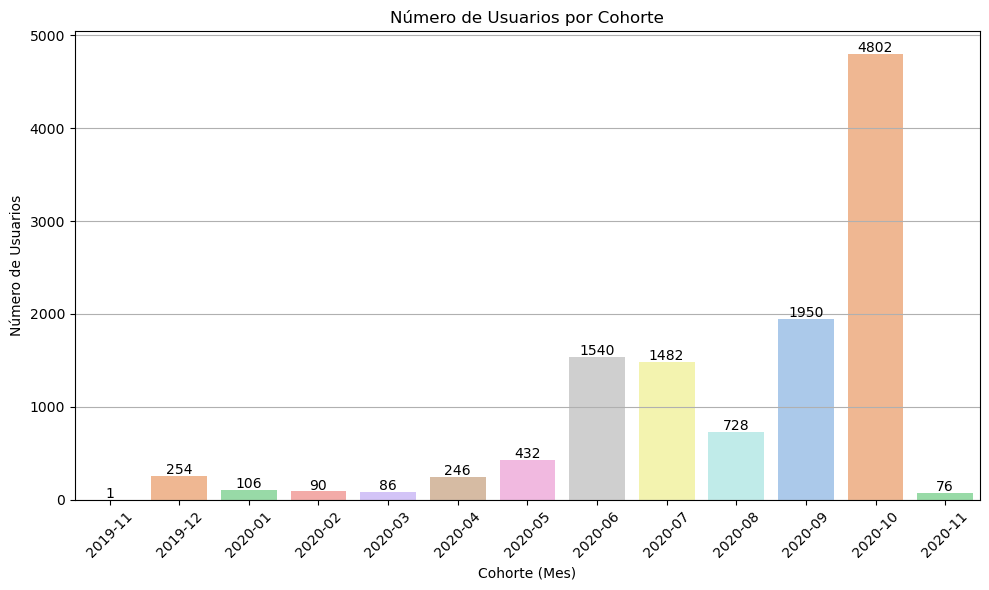

In [42]:
user_counts = df_cash_request_cohort.groupby('cohorte')['user_id'].nunique().reset_index()

user_counts.columns = ['cohorte', 'user_count']  # Renombrar columna para claridad


# Crear el gráfico de barras con Seaborn

plt.figure(figsize=(10, 6))

barplot = sns.barplot(data=user_counts, x='cohorte', y='user_count', palette='pastel')

plt.title('Número de Usuarios por Cohorte')

plt.xlabel('Cohorte (Mes)')

plt.ylabel('Número de Usuarios')

plt.xticks(rotation=45)

plt.grid(axis='y')

plt.tight_layout()


# Añadir números en cada barra
for index, row in user_counts.iterrows():

    barplot.text(index, row.user_count + 20, round(row.user_count, 2), color='black', ha="center")

plt.show()

In [43]:
df_cash_request_cohort[df_cash_request_cohort['cohorte'] == pd.Period('2020-08', freq='M')]

,id,user_id,created_at,cohorte
3864,11413,35438.0,2020-08-07,2020-08
4024,12963,36054.0,2020-08-18,2020-08
11677,12926,35940.0,2020-08-18,2020-08
4006,12034,29657.0,2020-08-11,2020-08
14903,12562,28597.0,2020-08-14,2020-08
...,...,...,...,...
5038,12261,25763.0,2020-08-12,2020-08
5349,13310,34970.0,2020-08-20,2020-08
6785,11398,32433.0,2020-08-07,2020-08
23874,11477,26215.0,2020-08-08,2020-08


In [44]:
df_cash_request_cohort[df_cash_request_cohort['cohorte']=='2020-8'].count()

id            728
user_id       728
created_at    728
cohorte       728
dtype: int64

## Obtener la Fecha de la Última Petición para Calcular el Período
Para calcular la frecuencia de uso del servicio, necesitamos la fecha de la última solicitud (`last_request`) para cada usuario. Esto nos permitirá calcular el período total de uso restando la fecha de la primera solicitud (`first_request`) de la última.

### Pasos:
1. Agrupar el DataFrame original (`df_cash_request`) por `user_id` para obtener la fecha de la última solicitud.
2. Utilizar la función `max()` para seleccionar la fecha más reciente para cada usuario.
3. Añadir la columna `last_request` al DataFrame `df_cash_request_cohort` para incluir la información del último uso del servicio.

In [46]:
df_cash_request_frec=df_cash_request_cohort.sort_values("user_id", ascending=True)

In [47]:
df_cash_request_frec["last_request"] = df_cash_request[["created_at", "user_id"]].groupby("user_id", as_index=False).max()["created_at"]


In [48]:
df_cash_request_frec.head()

,id,user_id,created_at,cohorte,last_request
538,1302,34.0,2020-04-20,2020-04,2020-10-09
180,326,35.0,2019-12-28,2019-12,2020-09-18
7920,3,47.0,2019-11-19,2019-11,2020-10-06
7216,200,52.0,2019-12-17,2019-12,2020-10-09
8114,276,53.0,2019-12-21,2019-12,2020-10-18


In [49]:
#Generamos dataframe sólo con el last request para añadirlo en el dataframe cohort
df_last_request=df_cash_request[["created_at", "user_id"]].groupby("user_id",as_index=False).agg('max')
df_last_request=df_last_request.rename(columns={'created_at':'last_request'})
df_last_request["last_request"] = pd.to_datetime(df_last_request["last_request"])

## Calcular el Período por Usuario
Una vez que tenemos tanto la fecha de la primera como de la última solicitud, podemos calcular el período de uso del servicio por cada usuario.

### Pasos:
1. Restar la columna `first_request` de `last_request` para obtener la duración total en días.
2. Guardar este valor en una nueva columna llamada `period`, que representa el período de uso del servicio por cada usuario.


In [51]:
df_cash_request_frec=df_cash_request_cohort.sort_values('user_id',ascending=True)

df_cash_request_frec=df_cash_request_frec.set_index('user_id').join(df_last_request.set_index('user_id'))

df_cash_request_frec['period']=df_cash_request_frec['last_request']-df_cash_request_frec['created_at']
df_cash_request_frec.head()

,id,created_at,cohorte,last_request,period
user_id,,,,,
34.0,1302,2020-04-20,2020-04,2020-04-20,0 days
35.0,326,2019-12-28,2019-12,2020-09-19,266 days
47.0,3,2019-11-19,2019-11,2020-10-31,347 days
52.0,200,2019-12-17,2019-12,2020-09-19,277 days
53.0,276,2019-12-21,2019-12,2020-10-22,306 days


## Agrupación de Solicitudes por Usuario
Se agrupan las solicitudes por usuario para determinar cuántas veces cada uno ha solicitado el servicio.

### Pasos:
1. Agrupar el DataFrame `df_cash_request` por `user_id`.
2. Contar el número de solicitudes para cada usuario.
3. Guardar el resultado en un nuevo DataFrame `df_n_request` con una columna `num_request`.


In [53]:
df_n_request=df_cash_request[["created_at", "user_id"]].groupby("user_id",as_index=False).count()
df_n_request=df_n_request.rename(columns={'created_at':'num_request'})
df_n_request

,user_id,num_request
0,34.0,1
1,35.0,7
2,47.0,8
3,52.0,4
4,53.0,4
...,...,...
11788,103425.0,1
11789,103437.0,1
11790,103496.0,1
11791,103503.0,1


In [54]:
df_cash_request_frec=df_cash_request_frec.join(df_n_request.set_index('user_id'))
df_cash_request_frec

,id,created_at,cohorte,last_request,period,num_request
user_id,,,,,,
34.0,1302,2020-04-20,2020-04,2020-04-20,0 days,1
35.0,326,2019-12-28,2019-12,2020-09-19,266 days,7
47.0,3,2019-11-19,2019-11,2020-10-31,347 days,8
52.0,200,2019-12-17,2019-12,2020-09-19,277 days,4
53.0,276,2019-12-21,2019-12,2020-10-22,306 days,4
...,...,...,...,...,...,...
103425.0,26992,2020-11-01,2020-11,2020-11-01,0 days,1
103437.0,26984,2020-11-01,2020-11,2020-11-01,0 days,1
103496.0,26983,2020-11-01,2020-11,2020-11-01,0 days,1


## Calcular la Frecuencia de Uso
Ahora que tenemos el período total de uso y el número de solicitudes, podemos calcular la frecuencia promedio con la que los usuarios han utilizado el servicio.

### Pasos:
1. Dividir la columna `period` por el número de solicitudes menos uno (`num_request - 1`) para calcular la frecuencia promedio en días entre solicitudes.
2. Para usuarios con una sola solicitud (`num_request` igual a 1), asignar una frecuencia de 0.
3. Guardar estos resultados en una nueva columna llamada `freq`.

In [56]:
df_cash_request_frec['freq'] = df_cash_request_frec.apply(lambda row: round((row['last_request'] - row['created_at']).days / (row['num_request'] - 1), 2) if row['num_request'] > 1 else 0,axis=1)

In [57]:
df_cash_request_frec.head()

,id,created_at,cohorte,last_request,period,num_request,freq
user_id,,,,,,,
34.0,1302,2020-04-20,2020-04,2020-04-20,0 days,1,0.00
35.0,326,2019-12-28,2019-12,2020-09-19,266 days,7,44.33
47.0,3,2019-11-19,2019-11,2020-10-31,347 days,8,49.57
52.0,200,2019-12-17,2019-12,2020-09-19,277 days,4,92.33
53.0,276,2019-12-21,2019-12,2020-10-22,306 days,4,102.00


## Visualización de la Relación entre Cohorte y Frecuencia

En esta sección, analizamos cómo varía la frecuencia promedio de uso del servicio entre diferentes cohortes. Para ello, seguimos los siguientes pasos:

### Pasos:

1. **Convertir la Columna `cohorte` a Tipo String:**
   Para facilitar la agrupación y visualización de los datos, convertimos la columna `cohorte` a tipo `str`. Esto nos permite trabajar mejor con los datos en el contexto de visualización y agrupación.
2. **Filtrar Usuarios con Más de una Solicitud:**
    Nos enfocamos en los usuarios que han realizado más de una solicitud (`num_request` > 1), ya que para ellos tiene sentido analizar la frecuencia de uso.
3. **Agrupar por Cohorte y Calcular la Media de la Frecuencia:**
    Agrupamos el DataFrame filtrado por la columna `cohorte` y calculamos la media de la columna `freq` para cada cohorte. Esto nos da la frecuencia promedio de uso del servicio para cada cohorte.
4. **Crear un Gráfico de Dispersión para Visualizar la Relación:**
    Utilizamos `seaborn` para crear un gráfico de dispersión que muestre la relación entre la cohorte y la frecuencia promedio de uso. El eje X representa las cohortes y el eje Y la frecuencia promedio de uso.

    - Configuramos las etiquetas del eje X con rotación para mejorar la legibilidad.
    - Añadimos un título al gráfico para describir la relación visualizada.

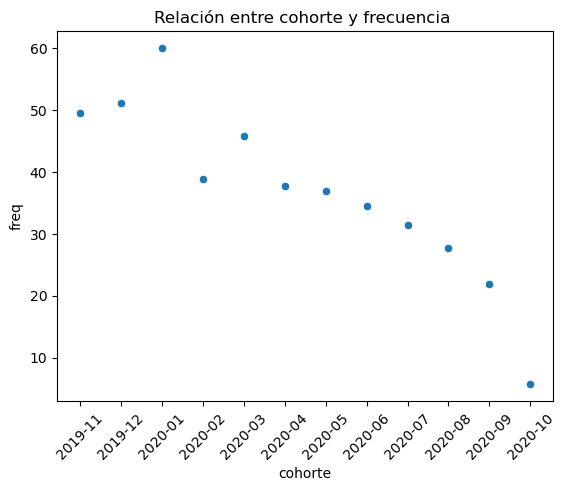

In [59]:
df_cash_request_frec['cohorte']=df_cash_request_frec['cohorte'].astype('str')

df_plot_cohort_freq_moreone=df_cash_request_frec[df_cash_request_frec['num_request']>1]

df_plot_cohort_freq_moreone=df_plot_cohort_freq_moreone[['cohorte','freq']].groupby('cohorte').mean().reset_index()

sns.scatterplot(data=df_plot_cohort_freq_moreone, x='cohorte', y='freq')
plt.title('Relación entre cohorte y frecuencia ')
plt.xticks(rotation=45)
plt.show()

## Análisis Comparativo: Relación entre Cohorte y Frecuencia vs. Número de Usuarios por Cohorte

Al comparar la gráfica de la relación entre cohorte y frecuencia con la del número de usuarios por cohorte, se observa una tendencia inversamente proporcional entre ambas. 

- Por ejemplo, en **octubre de 2020**, se aprecia un aumento en la frecuencia en la primera gráfica, mientras que en la segunda se observa una disminución en el número de usuarios. Esto indica que el cambio significativo en la frecuencia durante ese mes podría estar influenciado por la reducción en el número de usuarios en la cohorte.

- En el caso del **primer mes, noviembre de 2019**, solo hay un usuario en la cohorte. Esto significa que el valor de la frecuencia en ese mes no representa un promedio de varios usuarios, sino que refleja únicamente la frecuencia de un solo usuario.

### Conclusión
Para poder extraer conclusiones más sólidas y precisas, sería recomendable disponer de un mayor volumen de datos, lo que permitiría un análisis más representativo de las tendencias.

# Análisis de la Tasa de Incidentes por Cohorte

En este apartado, nos enfocaremos en calcular la tasa de incidentes de pago para cada cohorte. El objetivo es identificar si hay variaciones en la tasa de incidentes entre diferentes cohortes y comprender posibles patrones o áreas que requieren mejoras.

Para el cálculo utilizaremos el ratio entre intentos de pago con incidentes y el total de los pagos.



In [313]:
df_fees.value_counts("type")

type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64

## Identificar los Incidentes en `fees`

Primero, seleccionamos los registros en el DataFrame `df_fees` que corresponden a incidentes. Utilizamos la columna `type` para identificar estos incidentes, ya que están categorizados como `incident`.

En este caso al necesitar también el total de pagos, sólo identificaremos pero no aplicaremos dicho filtro al dataframe de trabajo.

### Pasos:

1. **Filtrar el DataFrame de `fees`:** Creamos un nuevo DataFrame `df_incidents_fees` que contiene únicamente los registros donde la columna `type` es igual a `incident`.

In [277]:
df_fees[df_fees["type"]=="incident"]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
7,14187,14839.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:50.655967+00,2020-10-16 23:48:50.655988+00,2020-11-05 14:15:36.600041+00,NaN,NaN,after
15,14420,17963.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:18:53.924407+00,2020-10-17 22:18:53.924429+00,2020-10-17 22:19:00.10911+00,NaN,NaN,after
27,14433,10287.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:19:48.806283+00,2020-10-17 22:19:48.806303+00,2020-12-17 14:33:35.516056+00,NaN,NaN,after
40,14188,15989.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:52.16855+00,2020-10-16 23:48:52.168578+00,2020-11-16 13:33:09.113667+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21044,3491,8952.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 23:00:44.214576+00,2020-10-13 14:25:02.938088+00,2020-10-08 07:24:45.091469+00,NaN,NaN,after
21045,7166,8952.0,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 01:37:43.458593+00,2020-10-13 14:25:02.546591+00,2020-10-08 07:24:44.561304+00,NaN,NaN,after
21046,12566,8952.0,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00,2020-10-13 14:25:18.627143+00,NaN,NaN,NaN,after
21047,13537,14289.0,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-14 22:35:49.950325+00,2020-10-14 22:35:49.950347+00,NaN,NaN,NaN,after


Este será el dataframe que nos ayudará a relacionar cada incidencia con las cohortes creadas en puntos anteriores

In [66]:
df_cash_request_cohort.head()

,id,user_id,created_at,cohorte
7920,3,47.0,2019-11-19,2019-11
7859,225,92.0,2019-12-18,2019-12
7858,294,1518.0,2019-12-23,2019-12
9141,191,1556.0,2019-12-16,2019-12
516,236,597.0,2019-12-18,2019-12


## Combinar los Incidentes con el DataFrame de cash_request
Para comprender mejor el contexto de los incidentes, es importante combinarlos con la información de las solicitudes de efectivo (cash_request). Esto se logra realizando un merge entre los dataframes fees y df_cash_request_cohort.

### Pasos:
1. **Realizar un merge:** Unimos `fees` con las solicitudes de `cash_request` utilizando la columna `cash_request_id` en fees y la columna `id` en `cash_request`.
   llamaremos al dataframe resultante df_incidents, por futuros usos, pero en este paso todavía no está filtrado el dataframe por incidentes.


In [280]:
df_incidents = pd.merge(  
    df_fees[['cash_request_id', "type"]],
    df_cash_request[['id', 'user_id']],
    left_on='cash_request_id',                                      
    right_on='id',                        
    how='left'                                         
)

In [282]:
df_incidents.head(20)

,cash_request_id,type,id,user_id
0,14941.0,instant_payment,14941.0,35661.0
1,11714.0,incident,11714.0,16158.0
2,23371.0,instant_payment,23371.0,81575.0
3,26772.0,instant_payment,26772.0,94393.0
4,19350.0,instant_payment,19350.0,19005.0
5,24052.0,instant_payment,24052.0,90386.0
6,25983.0,instant_payment,25983.0,57209.0
7,14839.0,incident,14839.0,30659.0
8,26572.0,instant_payment,26572.0,62523.0
9,22106.0,postpone,22106.0,77990.0


In [265]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cash_request_id  2196 non-null   float64
 1   type             2196 non-null   object 
 2   id               2196 non-null   int64  
 3   user_id          2196 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 68.8+ KB


## Combinar los Incidentes con el DataFrame de Cohortes
En este paso, combinamos la información del Data Frame nombrado df_incidentes con el DataFrame que contiene los cohortes (df_cash_request_cohort). El objetivo es asociar cada fee con la cohorte de cada usuario asociado a ella.

### Pasos:
1. **Unir `df_incidents` con `df_cash_request_cohort:`** Realizamos un merge entre el DataFrame de incidentes (`df_incidents`) y el DataFrame de cohortes (`df_cash_request_cohort`).La combinación se realiza utilizando la columna `user_id` en ambos DataFrames para enlazarlos.
2. **Verificar la Información del DataFrame Resultante:** Luego, verificamos la estructura del nuevo DataFrame utilizando `.info()` y `.head()` para asegurarnos de que la combinación se haya realizado correctamente y de que las columnas sean las esperadas.

In [284]:
df_incidents_cohort = pd.merge(  
    df_incidents[["user_id", 'cash_request_id', "type"]],
    df_cash_request_cohort[['id', 'user_id', "cohorte"]],
    left_on='user_id',                                      
    right_on='user_id',                        
    how='left'                                         
)

In [286]:
df_incidents_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   user_id          21057 non-null  float64  
 1   cash_request_id  21057 non-null  float64  
 2   type             21061 non-null  object   
 3   id               21057 non-null  float64  
 4   cohorte          21057 non-null  period[M]
dtypes: float64(3), object(1), period[M](1)
memory usage: 822.8+ KB


In [322]:
df_incidents_cohort.head()

,user_id,cash_request_id,type,id,cohorte
0,35661.0,14941.0,instant_payment,14941.0,2020-09
1,16158.0,11714.0,incident,4546.0,2020-06
2,81575.0,23371.0,instant_payment,23371.0,2020-10
3,94393.0,26772.0,instant_payment,26772.0,2020-10
4,19005.0,19350.0,instant_payment,5628.0,2020-06


## Calcular el Número Total de incidentes en las Fees por Cohorte
Para obtener la tasa de incidentes, primero necesitamos saber cuántos fees totales hubo en cada cohorte. Esto lo logramos creando un nuevo DataFrame que agrupa los datos por cohorte y cuenta el número de registros.

### Pasos:
1. **Contar los incidentes por cohorte:** Utilizando una condición filtramos todos los registros que contengan incidentes y con `groupby()` los agrupamos por cohorte y usando el método agregado `count` obtenemos el total de incidencias por cohorte.
2. **Agrupar por cohorte y contar los registros totales:** Utilizamos el método `groupby()` para agrupar los datos por la columna `cohorte` y luego usamos `count()` para contar el número de registros en cada cohorte.

In [325]:
df_incidents_cohort_count = df_incidents_cohort[df_incidents_cohort["type"]=="incident"].groupby("cohorte",as_index=False).count()

In [327]:
df_incidents_cohort_count.head()

,cohorte,user_id,cash_request_id,type,id
0,2019-12,53,53,53,53
1,2020-01,15,15,15,15
2,2020-02,24,24,24,24
3,2020-03,32,32,32,32
4,2020-04,119,119,119,119


In [330]:
 df_incidents_nofilter = df_incidents_cohort.groupby("cohorte", as_index=False).count()

In [332]:
 df_incidents_nofilter.head()

,cohorte,user_id,cash_request_id,type,id
0,2019-11,10,10,10,10
1,2019-12,311,311,311,311
2,2020-01,131,131,131,131
3,2020-02,193,193,193,193
4,2020-03,174,174,174,174


## Dividir el Número de Incidentes por el Total de Fees por Cohorte
Para calcular la tasa de incidentes, necesitamos dividir el número de incidentes por el número total de fees en cada cohorte y luego multiplicarlo por 100 para obtener el porcentaje.

### Pasos:
1. **Combinar los datos del número total de fees y del número de incidentes por cohorte:** Realizamos un `merge` para combinar el DataFrame que contiene el número total de fees (`df_incidents_nofilter`) con el DataFrame que contiene el número de incidentes (`df_incidents_cohort_count`). La combinación se realiza utilizando la columna `cohorte`.
2. **Renombrar las columnas para mayor claridad:** Cambiamos los nombres de las columnas `user_id_x` y `user_id_y` a `Fees_cohort` y `Incidents_cohort`, respectivamente, para que sean más descriptivas.
3. **Calcular la tasa de incidentes:** Dividimos el número de incidentes (`Incidents_cohort`) por el número total de fees (`Fees_cohort`) y multiplicamos el resultado por 100 para obtener la tasa de incidentes en porcentaje. Redondeamos a dos decimales.


In [334]:
incidents = pd.merge(  
    df_incidents_nofilter [["user_id","cohorte"]],
    df_incidents_cohort_count[['user_id', "cohorte"]],
    left_on='cohorte',                                      
    right_on='cohorte',                        
    how='left'                                         
)

In [336]:
incidents.head()

,user_id_x,cohorte,user_id_y
0,10,2019-11,NaN
1,311,2019-12,53.0
2,131,2020-01,15.0
3,193,2020-02,24.0
4,174,2020-03,32.0


In [338]:
incidents = incidents.rename(columns= {"user_id_x": "Fees_cohort", "user_id_y": "Incidents_cohort"})

In [340]:
incidents.head()

,Fees_cohort,cohorte,Incidents_cohort
0,10,2019-11,NaN
1,311,2019-12,53.0
2,131,2020-01,15.0
3,193,2020-02,24.0
4,174,2020-03,32.0


In [342]:
incidents["incident_rate"] = (incidents["Incidents_cohort"] / incidents["Fees_cohort"] * 100).round(2)

In [344]:
incidents.head()

,Fees_cohort,cohorte,Incidents_cohort,incident_rate
0,10,2019-11,NaN,NaN
1,311,2019-12,53.0,17.04
2,131,2020-01,15.0,11.45
3,193,2020-02,24.0,12.44
4,174,2020-03,32.0,18.39


## Visualizar la Tasa de Incidentes por Cohorte
Finalmente, creamos un gráfico de barras para visualizar la tasa de incidentes de pago por cohorte.

## Pasos:
1. **Convertir la columna cohorte a cadena de texto:** Convertimos la columna `cohorte` al tipo de dato `str` para facilitar la visualización.
2. **Configurar el gráfico de barras:** Utilizamos `matplotlib` para crear un gráfico de barras que muestra la tasa de incidentes por cohorte.
3. **Añadir título y etiquetas a los ejes:** Configuramos el título del gráfico y las etiquetas de los ejes `x` e `y`.
4. **Mostrar el gráfico:** Finalmente, mostramos el gráfico en pantalla.

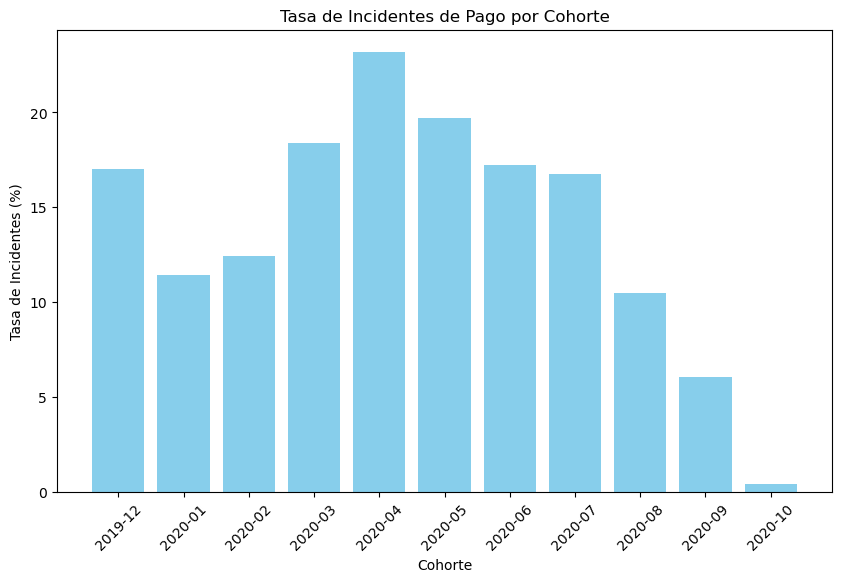

In [360]:
incidents['cohorte'] = incidents['cohorte'].astype(str)

plt.figure(figsize=(10, 6))

plt.bar(incidents['cohorte'], incidents['incident_rate'], color='skyblue')

plt.title('Tasa de Incidentes de Pago por Cohorte')

plt.xlabel('Cohorte')

plt.ylabel('Tasa de Incidentes (%)')

plt.xticks(rotation=45)  

plt.show()

## Análisis de la Tasa de Incidentes por Cohorte

Al analizar la tasa de incidentes por cohorte, se pueden identificar patrones importantes en la evolución de los incidentes a lo largo del tiempo:

- En **marzo de 2020**, los datos muestran una disminución en el número de usuarios por cohorte en comparación con febrero de 2020. Además, también se observa una reducción en la frecuencia de solicitudes de adelanto de efectivo y en el número total de fees. Sin embargo, a pesar de estas disminuciones, la tasa de incidentes experimenta un incremento significativo. Esto sugiere que, aunque había menos usuarios y solicitudes, la proporción de incidentes fue mayor.

- A partir de **marzo de 2020**, la situación cambia: la tasa de incidentes disminuye mes a mes, incluso cuando el número de usuarios por cohorte aumenta. Esta tendencia puede indicar una mejora en la gestión de incidentes o una mayor eficiencia en los procesos de cobro conforme el servicio gana más usuarios.

### Conclusión
Para extraer conclusiones más detalladas y precisas, sería beneficioso contar con un mayor volumen de datos y analizar otros factores que puedan estar influyendo en la tasa de incidentes, tales como cambios en las políticas de cobro o ajustes en la operativa del servicio.

# Análisis de los Ingresos Generados por la Cohorte

En este apartado, calcularemos el total de ingresos generados por cada cohorte a lo largo del tiempo. El objetivo es evaluar el impacto financiero del comportamiento de los usuarios y comprender si existen diferencias significativas entre las cohortes en términos de generación de ingresos.

## Verificación de los Datos Iniciales

Antes de proceder con el análisis, realizamos una verificación inicial de los datos para entender la distribución de los montos totales y la relación con las solicitudes de efectivo.

### Pasos:
1. **Revisar los valores del DataFrame `df_fees`:**
   Comprobamos la frecuencia de los valores en la columna `total_amount` para identificar posibles irregularidades o patrones.
   
2. **Agrupar por `cash_request_id`:**
   Contamos el número de fees asociados a cada solicitud para verificar si hay varias tarifas relacionadas con una misma solicitud.
   
3. **Filtrar registros específicos:**
   Seleccionamos una solicitud específica (`cash_request_id == 1554`) para inspeccionar la evolución de los fees a lo largo del tiempo.

In [92]:
df_fees.value_counts("total_amount")

total_amount
5.0     21060
10.0        1
Name: count, dtype: int64

In [93]:
df_fees.groupby("cash_request_id").count()

,id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
cash_request_id,,,,,,,,,,,,
1456.0,1,1,1,0,1,1,1,1,0,1,1,1
1503.0,3,3,3,0,3,3,3,3,0,3,3,3
1518.0,8,8,8,0,8,8,8,8,0,8,8,8
1554.0,4,4,4,0,4,4,4,4,1,4,4,4
1556.0,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27004.0,1,1,1,0,1,1,1,1,1,0,0,1
27006.0,1,1,1,0,1,1,1,1,1,0,0,1
27007.0,1,1,1,0,1,1,1,1,1,0,0,1


In [94]:
df_fees[df_fees["cash_request_id"]==1554].sort_values(by="created_at", ascending=True)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1213,51,1554.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1554,2020-06-01 19:29:27.603878+00,2020-10-13 14:25:00.797171+00,NaN,2020-06-18 22:00:00+00,2020-07-06 22:00:00+00,before
16332,692,1554.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1554,2020-06-27 00:44:09.957168+00,2020-10-13 14:25:15.822258+00,NaN,2020-07-06 22:00:00+00,2020-08-05 22:00:00+00,after
16459,927,1554.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1554,2020-07-01 23:05:57.08772+00,2020-10-13 14:25:16.002938+00,NaN,2020-07-06 22:00:00+00,2020-08-05 22:00:00+00,after
1766,928,1554.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1554,2020-07-01 23:07:59.917774+00,2020-10-13 14:25:01.81737+00,2020-07-01 23:08:03.927568+00,2020-07-06 22:00:00+00,2020-08-05 22:00:00+00,before


## Filtrar los Fees Pagados

Para calcular los ingresos por cohorte, filtramos los registros para incluir solo aquellos en los que se haya realizado el pago correspondiente. Esto se determina revisando si la columna `paid_at` contiene una fecha.

### Pasos:
1. **Filtrar los fees pagados:**
   Creamos un nuevo DataFrame `df_paid_fees` que solo incluye los registros donde la columna `paid_at` no es nula, ya que estos indican pagos completados.
   
2. **Verificar la estructura del DataFrame:**
   Inspeccionamos el nuevo DataFrame para confirmar que contiene la información relevante para el análisis.


In [96]:
df_paid_fees = df_fees[["id", "cash_request_id", "type"]][df_fees['paid_at'].notna()]

In [97]:
df_paid_fees.head()

,id,cash_request_id,type
0,6537,14941.0,instant_payment
1,6961,11714.0,incident
2,16296,23371.0,instant_payment
3,20775,26772.0,instant_payment
4,11242,19350.0,instant_payment


In [98]:
df_paid_fees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15531 entries, 0 to 21060
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15531 non-null  int64  
 1   cash_request_id  15531 non-null  float64
 2   type             15531 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 485.3+ KB


In [99]:
df_cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10,2019-12-11,804.0,2019-12-11,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
1,70,100.0,rejected,2019-12-10,2019-12-11,231.0,2019-12-11,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
2,7,100.0,rejected,2019-12-10,2019-12-11,191.0,2019-12-11,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
3,10,99.0,rejected,2019-12-10,2019-12-18,761.0,2019-12-18,NaN,2020-01-09,NaN,NaT,regular,NaT,NaN,NaT,NaT
4,1594,100.0,rejected,2020-05-06,2020-05-07,7686.0,2020-05-07,NaN,NaT,NaN,NaT,regular,NaT,NaN,NaT,NaT



## Unir los Fees Pagados con `df_cash_request`

A continuación, combinamos los datos de los fees pagados con la información de las solicitudes (`df_cash_request`) para asignar los pagos a los `user_id` correspondientes.

### Pasos:
1. **Unir los DataFrames:**
   Realizamos un merge entre `df_paid_fees` y `df_cash_request`, manteniendo solo las columnas relevantes para el análisis (`id_x`, `cash_request_id`, `paid_at`, `user_id`, y `total_amount`).
   
2. **Renombrar columnas:**
   Cambiamos el nombre de la columna `id_x` a `fee_id` para clarificar que representa el identificador del fee.

In [101]:
total_fees = pd.merge(  
    df_fees [["id", "cash_request_id","paid_at","total_amount"]],
    df_cash_request [["id", "user_id"]],
    left_on='cash_request_id',                                      
    right_on='id',                        
    how='left'                                         
)

In [102]:
total_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_x             21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   paid_at          15531 non-null  object 
 3   total_amount     21061 non-null  float64
 4   id_y             21057 non-null  float64
 5   user_id          21057 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 987.4+ KB


In [103]:
total_fees.head()

,id_x,cash_request_id,paid_at,total_amount,id_y,user_id
0,6537,14941.0,2020-12-17 14:50:07.47011+00,5.0,14941.0,35661.0
1,6961,11714.0,2020-12-08 17:13:10.45908+00,5.0,11714.0,16158.0
2,16296,23371.0,2020-11-04 19:34:37.43291+00,5.0,23371.0,81575.0
3,20775,26772.0,2020-11-19 05:09:22.500223+00,5.0,26772.0,94393.0
4,11242,19350.0,2020-11-02 14:45:20.355598+00,5.0,19350.0,19005.0


In [104]:
total_fees = total_fees[["id_x","cash_request_id", "paid_at", "user_id", "total_amount"]]

In [105]:
total_fees.head()

,id_x,cash_request_id,paid_at,user_id,total_amount
0,6537,14941.0,2020-12-17 14:50:07.47011+00,35661.0,5.0
1,6961,11714.0,2020-12-08 17:13:10.45908+00,16158.0,5.0
2,16296,23371.0,2020-11-04 19:34:37.43291+00,81575.0,5.0
3,20775,26772.0,2020-11-19 05:09:22.500223+00,94393.0,5.0
4,11242,19350.0,2020-11-02 14:45:20.355598+00,19005.0,5.0


In [106]:
total_fees = total_fees.rename(columns= {"id_x": "fee_id"})

In [107]:
total_fees.head()

,fee_id,cash_request_id,paid_at,user_id,total_amount
0,6537,14941.0,2020-12-17 14:50:07.47011+00,35661.0,5.0
1,6961,11714.0,2020-12-08 17:13:10.45908+00,16158.0,5.0
2,16296,23371.0,2020-11-04 19:34:37.43291+00,81575.0,5.0
3,20775,26772.0,2020-11-19 05:09:22.500223+00,94393.0,5.0
4,11242,19350.0,2020-11-02 14:45:20.355598+00,19005.0,5.0


## Asignar Cohortes a los Fees Pagados

Ahora, asignamos a cada fee pagado su cohorte correspondiente, realizando un merge con `df_cash_request_cohort` utilizando la columna `user_id`.

### Pasos:
1. **Unir con el DataFrame de Cohortes:**
   Realizamos un merge entre el DataFrame de fees pagados (`total_fees`) y el DataFrame de cohortes (`df_cash_request_cohort`) para asociar cada fee con su cohorte.
   
2. **Filtrar los registros no válidos:**
   Eliminamos los registros en los que `cash_request_id` o `paid_at` sean nulos, ya que estos no son relevantes para el cálculo de los ingresos generados.

In [109]:
total_fees_cohort = pd.merge(  
    total_fees [["fee_id", "cash_request_id","paid_at", "user_id", "total_amount"]],
    df_cash_request_cohort [["user_id", "cohorte"]],
    left_on='user_id',                                      
    right_on='user_id',                        
    how='left'                                         
)

In [110]:
total_fees_cohort.head()

,fee_id,cash_request_id,paid_at,user_id,total_amount,cohorte
0,6537,14941.0,2020-12-17 14:50:07.47011+00,35661.0,5.0,2020-09
1,6961,11714.0,2020-12-08 17:13:10.45908+00,16158.0,5.0,2020-06
2,16296,23371.0,2020-11-04 19:34:37.43291+00,81575.0,5.0,2020-10
3,20775,26772.0,2020-11-19 05:09:22.500223+00,94393.0,5.0,2020-10
4,11242,19350.0,2020-11-02 14:45:20.355598+00,19005.0,5.0,2020-06


In [111]:
total_fees_cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   fee_id           21061 non-null  int64    
 1   cash_request_id  21057 non-null  float64  
 2   paid_at          15531 non-null  object   
 3   user_id          21057 non-null  float64  
 4   total_amount     21061 non-null  float64  
 5   cohorte          21057 non-null  period[M]
dtypes: float64(3), int64(1), object(1), period[M](1)
memory usage: 987.4+ KB


In [112]:
total_fees_cohort = total_fees_cohort[total_fees_cohort['cash_request_id'].notna()]

In [113]:
total_fees_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21057 entries, 0 to 21060
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   fee_id           21057 non-null  int64    
 1   cash_request_id  21057 non-null  float64  
 2   paid_at          15531 non-null  object   
 3   user_id          21057 non-null  float64  
 4   total_amount     21057 non-null  float64  
 5   cohorte          21057 non-null  period[M]
dtypes: float64(3), int64(1), object(1), period[M](1)
memory usage: 1.1+ MB


In [114]:
total_fees_cohort = total_fees_cohort[total_fees_cohort['paid_at'].notna()]

In [115]:
total_fees_cohort.head()

,fee_id,cash_request_id,paid_at,user_id,total_amount,cohorte
0,6537,14941.0,2020-12-17 14:50:07.47011+00,35661.0,5.0,2020-09
1,6961,11714.0,2020-12-08 17:13:10.45908+00,16158.0,5.0,2020-06
2,16296,23371.0,2020-11-04 19:34:37.43291+00,81575.0,5.0,2020-10
3,20775,26772.0,2020-11-19 05:09:22.500223+00,94393.0,5.0,2020-10
4,11242,19350.0,2020-11-02 14:45:20.355598+00,19005.0,5.0,2020-06


In [116]:
total_fees_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15531 entries, 0 to 21060
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   fee_id           15531 non-null  int64    
 1   cash_request_id  15531 non-null  float64  
 2   paid_at          15531 non-null  object   
 3   user_id          15531 non-null  float64  
 4   total_amount     15531 non-null  float64  
 5   cohorte          15531 non-null  period[M]
dtypes: float64(3), int64(1), object(1), period[M](1)
memory usage: 849.4+ KB


## Calcular el Total de Ingresos por Cohorte

Agrupamos los datos por cohorte y sumamos los montos totales para calcular el total de ingresos generados por cada cohorte. Esto nos permitirá evaluar cómo varían los ingresos entre cohortes.

### Pasos:
1. **Agrupar y sumar los montos por cohorte:**
   Utilizamos el método `groupby()` para agrupar los datos por la columna `cohorte` y calculamos la suma de `total_amount` en cada cohorte.
   
2. **Convertir la columna `cohorte` a string:**
   Convertimos la columna `cohorte` a tipo `str` para facilitar su visualización en el gráfico.

In [118]:
total_amount = total_fees_cohort[["cohorte", "total_amount"]].groupby("cohorte").agg("sum")

In [119]:
total_amount = total_amount.reset_index()
total_amount['cohorte'] = total_amount['cohorte'].astype(str)
total_amount

,cohorte,total_amount
0,2019-11,30.0
1,2019-12,1090.0
2,2020-01,460.0
3,2020-02,620.0
4,2020-03,620.0
5,2020-04,1670.0
6,2020-05,3785.0
7,2020-06,14475.0
8,2020-07,11845.0
9,2020-08,5390.0


## Visualizar el Total de Ingresos por Cohorte

Para comprender mejor los resultados, creamos un gráfico de barras que muestra el total de ingresos por cohorte. Este gráfico nos ayudará a identificar patrones y tendencias en la generación de ingresos a lo largo del tiempo.

### Pasos:
1. **Configurar el gráfico de barras:**
   Utilizamos `matplotlib` para crear un gráfico de barras con el total de ingresos por cohorte.
   
2. **Añadir título y etiquetas a los ejes:**
   Configuramos el título del gráfico y las etiquetas de los ejes para mejorar la claridad.
   
3. **Mostrar el gráfico:**
   Finalmente, visualizamos el gráfico para evaluar las diferencias en los ingresos generados por cohorte.


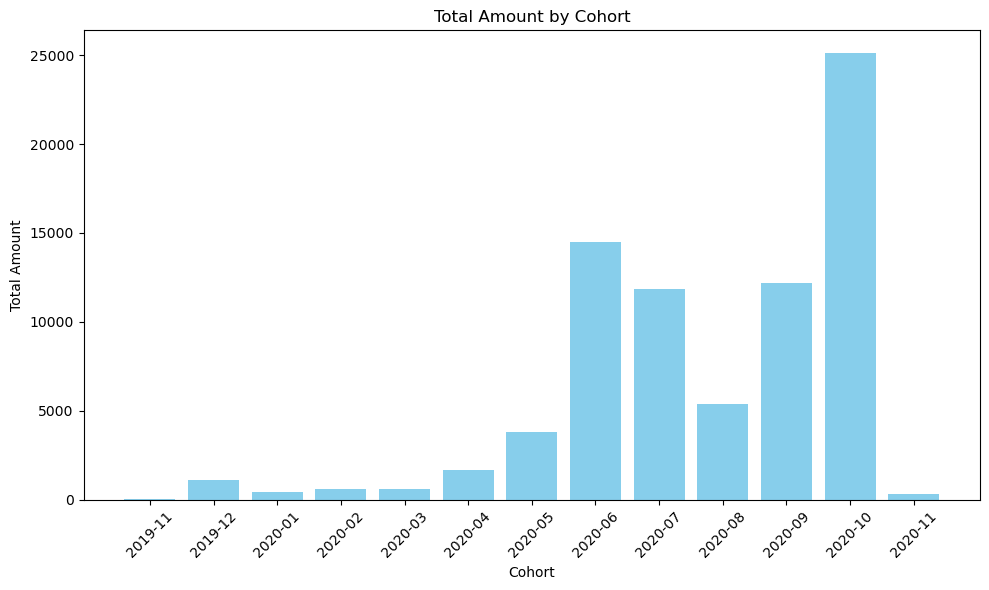

In [121]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(total_amount['cohorte'], total_amount['total_amount'], color='skyblue')
plt.title('Total Amount by Cohort')
plt.xlabel('Cohort')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Análisis Comparativo: Relación entre Cohorte y Frecuencia vs. Número de Usuarios por Cohorte

Al comparar la gráfica de la relación entre cohorte y frecuencia con la del número de usuarios por cohorte, se observa una tendencia inversamente proporcional entre ambas. 

- En **octubre de 2020**, se aprecia un aumento en la frecuencia en la primera gráfica, mientras que en la segunda se observa una disminución en el número de usuarios. Esto indica que el cambio significativo en la frecuencia durante ese mes podría estar influenciado por la reducción en el número de usuarios en la cohorte.

- En el caso del **primer mes, noviembre de 2019**, solo hay un usuario en la cohorte. Esto significa que el valor de la frecuencia en ese mes no representa un promedio de varios usuarios, sino que refleja únicamente la frecuencia de un solo usuario.

### Conclusión
El crecimiento en los ingresos refleja una mejora en la adopción del servicio y en la retención de usuarios. Sin embargo, para mantener esta tendencia positiva, sería importante analizar más a fondo la relación entre la frecuencia de uso, el número de usuarios y los ingresos para asegurarse de que el crecimiento sea sostenible.

# Análisis de la Tasa de Morosidad por Cohorte

En este apartado, evaluaremos la tasa de morosidad, es decir, los usuarios que no han realizado el pago de sus fees y han eliminado su cuenta. Calcularemos esta métrica para cada cohorte con el objetivo de identificar posibles patrones de comportamiento de morosidad a lo largo del tiempo.

## Identificar los Usuarios con Fees Impagos

Primero, identificamos los fees que no han sido pagados agrupando los datos por `cash_request_id` y filtrando aquellos registros donde no exista una fecha de pago.

### Pasos:
1. **Agrupar los datos por `cash_request_id`:**
   Creamos un nuevo DataFrame `defaulters` que cuenta el número de registros en la columna `paid_at` para cada `cash_request_id`.
   
2. **Filtrar los registros impagos:**
   Seleccionamos aquellos registros donde el valor de `paid_at` sea igual a 0, lo que indica que no se ha registrado ningún pago.

In [124]:
defaulters = df_fees[['id','cash_request_id','paid_at']].groupby('cash_request_id',as_index=False).count()
defaulters

,cash_request_id,id,paid_at
0,1456.0,1,0
1,1503.0,3,0
2,1518.0,8,0
3,1554.0,4,1
4,1556.0,1,0
...,...,...,...
12928,27004.0,1,1
12929,27006.0,1,1
12930,27007.0,1,1
12931,27009.0,1,1


In [125]:
defaulters=defaulters[defaulters['paid_at']==0]
defaulters.value_counts('cash_request_id')

cash_request_id
1456.0     1
8772.0     1
8700.0     1
8735.0     1
8739.0     1
          ..
4462.0     1
4463.0     1
4468.0     1
4545.0     1
26867.0    1
Name: count, Length: 627, dtype: int64

## Relacionar los Fees Impagos con los Usuarios Eliminados

Para analizar el comportamiento de morosidad, es importante saber si los usuarios con fees impagos han eliminado sus cuentas.

### Pasos:
1. **Unir el DataFrame de fees impagos con `df_cash_request`:**
   Realizamos un merge entre `defaulters` y `df_cash_request` utilizando `cash_request_id` y `id` para enlazar los datos.
   
2. **Filtrar los registros donde `deleted_account_id` no sea nulo:**
   Seleccionamos únicamente los registros donde `deleted_account_id` tiene un valor, lo que indica que el usuario ha eliminado su cuenta.

3. **Seleccionar las columnas relevantes:**
   Filtramos las columnas para quedarnos con `id`, `cash_request_id`, `user_id`, y `deleted_account_id`.

In [127]:
defaulters_fees_user = pd.merge(  
    defaulters [["cash_request_id","paid_at"]],
    df_cash_request[['id',"user_id", "deleted_account_id"]],
    left_on='cash_request_id',                                      
    right_on='id',                        
    how='left'                                         
)
defaulters_fees_user

,cash_request_id,paid_at,id,user_id,deleted_account_id
0,1456.0,0,1456,8379.0,NaN
1,1503.0,0,1503,8500.0,NaN
2,1518.0,0,1518,6865.0,NaN
3,1556.0,0,1556,4881.0,NaN
4,1591.0,0,1591,1628.0,NaN
...,...,...,...,...,...
622,26297.0,0,26297,80736.0,NaN
623,26335.0,0,26335,99823.0,NaN
624,26345.0,0,26345,98081.0,NaN
625,26751.0,0,26751,97516.0,NaN


In [128]:
defaulters_fees_user=defaulters_fees_user[defaulters_fees_user["deleted_account_id"].notna()]
defaulters_fees_user

,cash_request_id,paid_at,id,user_id,deleted_account_id
5,1602.0,0,1602,5642.0,5642.0
9,1686.0,0,1686,9744.0,9744.0
39,2258.0,0,2258,13352.0,13352.0
50,2329.0,0,2329,4384.0,4384.0
54,2362.0,0,2362,8039.0,8039.0
83,2603.0,0,2603,10430.0,10430.0
95,2734.0,0,2734,3868.0,3868.0
96,2745.0,0,2745,4453.0,4453.0
98,2773.0,0,2773,18881.0,18881.0
143,3365.0,0,3365,4438.0,4438.0


In [129]:

defaulters_fees_user=defaulters_fees_user[['id','cash_request_id','user_id','deleted_account_id']]
defaulters_fees_user

,id,cash_request_id,user_id,deleted_account_id
5,1602,1602.0,5642.0,5642.0
9,1686,1686.0,9744.0,9744.0
39,2258,2258.0,13352.0,13352.0
50,2329,2329.0,4384.0,4384.0
54,2362,2362.0,8039.0,8039.0
83,2603,2603.0,10430.0,10430.0
95,2734,2734.0,3868.0,3868.0
96,2745,2745.0,4453.0,4453.0
98,2773,2773.0,18881.0,18881.0
143,3365,3365.0,4438.0,4438.0


## Asociar los Morosos con sus Cohortes

Para calcular la tasa de morosidad por cohorte, necesitamos asociar cada usuario con su cohorte correspondiente.

### Pasos:
1. **Unir los datos de morosos con `df_cash_request_cohort`:**
   Realizamos un merge utilizando la columna `user_id` para enlazar el DataFrame de morosos con el DataFrame de cohortes.
   
2. **Contar el número de morosos por cohorte:**
   Agrupamos los datos por `cohorte` y contamos el número de `user_id` en cada cohorte para obtener la cantidad de usuarios morosos.

3. **Convertir la columna `cohorte` a string:**
   Convertimos la columna `cohorte` al tipo `str` para facilitar la visualización.

In [131]:
defaulters_fees_cohort = pd.merge(  
    defaulters_fees_user [['id',"cash_request_id","user_id"]],
    df_cash_request_cohort[["user_id", "cohorte"]],
    left_on='user_id',                                      
    right_on='user_id',                        
    how='left'                                         
)

In [132]:
df_cash_request_cohort

,id,user_id,created_at,cohorte
7920,3,47.0,2019-11-19,2019-11
7859,225,92.0,2019-12-18,2019-12
7858,294,1518.0,2019-12-23,2019-12
9141,191,1556.0,2019-12-16,2019-12
516,236,597.0,2019-12-18,2019-12
...,...,...,...,...
17310,26962,103243.0,2020-11-01,2020-11
21650,26919,21056.0,2020-11-01,2020-11
19533,26915,102849.0,2020-11-01,2020-11
18321,26902,100462.0,2020-11-01,2020-11


In [133]:
defaulters_fees_cohort.value_counts('user_id')

user_id
3964.0     2
8039.0     2
4438.0     2
21453.0    2
14798.0    2
17685.0    1
11078.0    1
11636.0    1
13352.0    1
13579.0    1
15491.0    1
3868.0     1
18881.0    1
10430.0    1
20077.0    1
20447.0    1
21035.0    1
22107.0    1
22307.0    1
23650.0    1
19730.0    1
9744.0     1
10250.0    1
6471.0     1
4011.0     1
4384.0     1
4453.0     1
4472.0     1
4485.0     1
4545.0     1
4558.0     1
4559.0     1
4639.0     1
5028.0     1
5491.0     1
5642.0     1
5664.0     1
5677.0     1
6334.0     1
23836.0    1
Name: count, dtype: int64

In [134]:
df_cash_request_cohort

,id,user_id,created_at,cohorte
7920,3,47.0,2019-11-19,2019-11
7859,225,92.0,2019-12-18,2019-12
7858,294,1518.0,2019-12-23,2019-12
9141,191,1556.0,2019-12-16,2019-12
516,236,597.0,2019-12-18,2019-12
...,...,...,...,...
17310,26962,103243.0,2020-11-01,2020-11
21650,26919,21056.0,2020-11-01,2020-11
19533,26915,102849.0,2020-11-01,2020-11
18321,26902,100462.0,2020-11-01,2020-11


In [135]:
defaulters_fees_cohort = defaulters_fees_cohort[['cohorte','user_id']].groupby('cohorte').count()

In [136]:
defaulters_fees_cohort = defaulters_fees_cohort.reset_index()
defaulters_fees_cohort['cohorte'] = defaulters_fees_cohort['cohorte'].astype(str)
defaulters_fees_cohort

,cohorte,user_id
0,2019-12,1
1,2020-03,3
2,2020-04,1
3,2020-05,7
4,2020-06,23
5,2020-07,9
6,2020-10,1


## Visualizar la Tasa de Morosidad por Cohorte

Finalmente, creamos un gráfico de barras para visualizar el número de usuarios morosos por cohorte. Este gráfico nos ayudará a identificar si existe una relación entre el tiempo y la tasa de morosidad.

### Pasos:
1. **Configurar el gráfico de barras:**
   Utilizamos `matplotlib` para crear un gráfico de barras que muestra la cantidad de morosos por cohorte.
   
2. **Añadir título y etiquetas a los ejes:**
   Configuramos el título del gráfico y las etiquetas de los ejes `x` e `y` para proporcionar contexto.
   
3. **Mostrar el gráfico:**
   Finalmente, mostramos el gráfico para analizar la distribución de la morosidad en las diferentes cohortes.


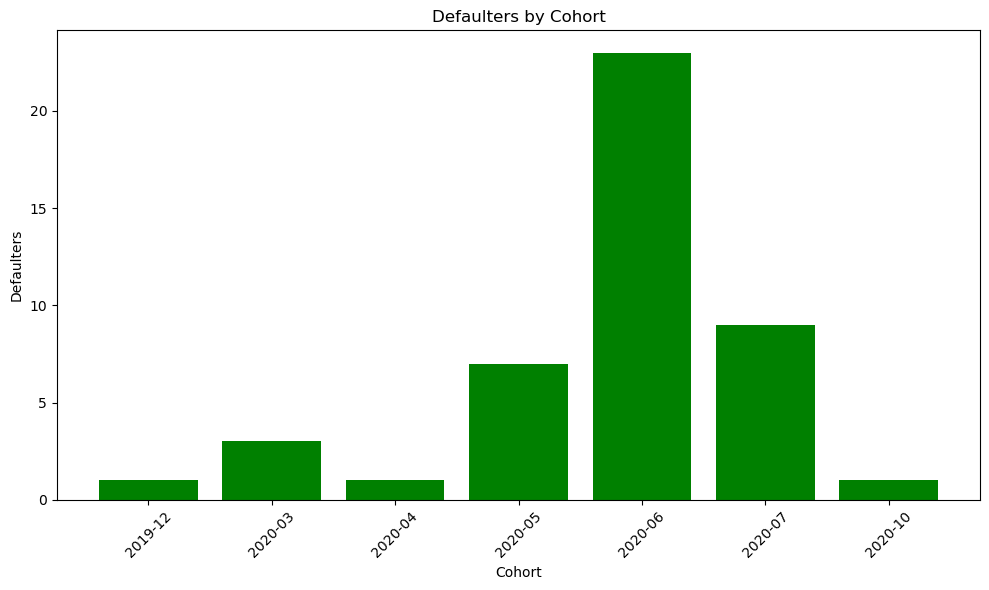

In [362]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(defaulters_fees_cohort['cohorte'], defaulters_fees_cohort['user_id'], color='green')
plt.title('Defaulters by Cohort')
plt.xlabel('Cohort')
plt.ylabel('Defaulters')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Análisis de la Tasa de Morosidad por Cohorte

El análisis de la tasa de morosidad muestra que las cohortes de **junio y julio de 2020** tienen un número elevado de usuarios morosos, lo que representa un reto para la sostenibilidad del negocio. Este comportamiento coincide con el aumento en la cantidad de usuarios durante esos meses, lo que podría haber llevado a un incremento en los impagos.

- La tasa de morosidad tiende a ser más alta en cohortes que también muestran picos en el número de usuarios y en la frecuencia de uso. Esto podría indicar que la rapidez en el crecimiento de la base de usuarios ha llevado a que algunos usuarios no sean completamente evaluados en cuanto a su capacidad de pago, o que no se les ofrezca suficiente soporte en caso de dificultades financieras.

- A partir de **octubre de 2020**, la tasa de morosidad disminuye considerablemente. Este cambio podría deberse a una mejor gestión de la morosidad o a políticas más efectivas para prevenir impagos.

### Conclusión
El aumento en la tasa de morosidad en algunos meses coincide con los periodos de mayor crecimiento en el número de usuarios. Para reducir el riesgo financiero, sería importante implementar medidas de seguimiento más estrictas y mejorar las políticas de gestión de morosidad, especialmente en meses donde se observa un rápido aumento de la base de usuarios.

### Hallazgos Clave

1. **Frecuencia y Número de Usuarios:** La relación observada entre la frecuencia de uso y el número de usuarios sugiere que, cuando hay menos usuarios en una cohorte, el servicio tiende a ser utilizado con menos frecuencia. Sin embargo, al aumentar la cantidad de usuarios, las solicitudes se vuelven más frecuentes, lo que podría estar asociado con la adopción más activa del servicio.
  
2. **Tasa de Incidentes:** Aunque la frecuencia de uso aumenta y el número de usuarios crece, la tasa de incidentes ha mostrado una tendencia descendente desde marzo de 2020, lo que sugiere que las mejoras en la gestión de incidentes han tenido un impacto positivo.

3. **Ingresos Generados:** El aumento en los ingresos, especialmente a partir de junio de 2020, coincide con una mayor actividad en la plataforma y un aumento en el número de usuarios. No obstante, hay que monitorear la relación con la morosidad para asegurar la sostenibilidad de los ingresos.

4. **Tasa de Morosidad:** El aumento en la tasa de morosidad en ciertas cohortes coincide con el crecimiento rápido en la base de usuarios, lo que indica que el crecimiento debe ser acompañado de políticas adecuadas para la gestión de impagos.

### Recomendaciones

- **Mejorar la evaluación de riesgos:** A medida que crece la base de usuarios, es crucial implementar procesos de evaluación que puedan adaptarse al volumen y detectar a tiempo a los usuarios con mayor riesgo de morosidad.

- **Optimizar la frecuencia de uso:** Es importante seguir incentivando a los usuarios a utilizar el servicio de manera recurrente, sin comprometer la calidad de la evaluación crediticia.

- **Monitorear la relación entre ingresos y morosidad:** Aunque el crecimiento en los ingresos es una señal positiva, hay que asegurarse de que este crecimiento no venga acompañado de un aumento significativo en la morosidad.
